In [1]:
!pip install torch git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-i9z2stpx
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-i9z2stpx
  Resolved https://github.com/huggingface/transformers to commit e5fd865ebae062b7cf03a81b8c6affeb39f30bec
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 125.6 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.48.0.dev0-py3-none-any.whl size=10329101 sha256=c513f2411a46e96fccdb1156a840632e8c7a4da66ceaef16c971a220c52c5cf6
  Stored in directory: /tmp/pip-ephem-wheel-cache-qunk79yp/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers


In [2]:
!pip install jupyterlab ipywidgets bertviz evaluate matplotlib

  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
Using cached packaging-24.2-py3-none-any.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.9
    Uninstalling dill-0.3.9:
      Successfully uninstalled dill-0.3.9
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.17
    Uninstalling multiprocess-0.70.17:
      Successfully uninstalled multiprocess-0.70.17
ERROR: pip's dependency resolver does not currently take into account all the

# Tokenizers

In [3]:
from transformers import BertModel, BertTokenizer

modelName = "bert-base-uncased"

tokenizer = BertTokenizer.from_pretrained(modelName)
model = BertModel.from_pretrained(modelName)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [4]:
tokenized = tokenizer("I read a good novel.")
print(tokenized)

{'input_ids': [101, 1045, 3191, 1037, 2204, 3117, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}


In [5]:
tokens = tokenizer.convert_ids_to_tokens(tokenized["input_ids"])
print(tokens)

['[CLS]', 'i', 'read', 'a', 'good', 'novel', '.', '[SEP]']


# Positional Encoding

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def encodePositions(num_tokens, depth, n=10000):
    positionalMatrix = np.zeros((num_tokens, depth))
    for row in range(num_tokens):
        for col in np.arange(int(depth/2)):
            denominator = np.power(n, 2*col/depth)
            positionalMatrix[row, 2*col] = np.sin(row/denominator)
            positionalMatrix[row, 2*col+1] = np.cos(row/denominator)
    return positionalMatrix

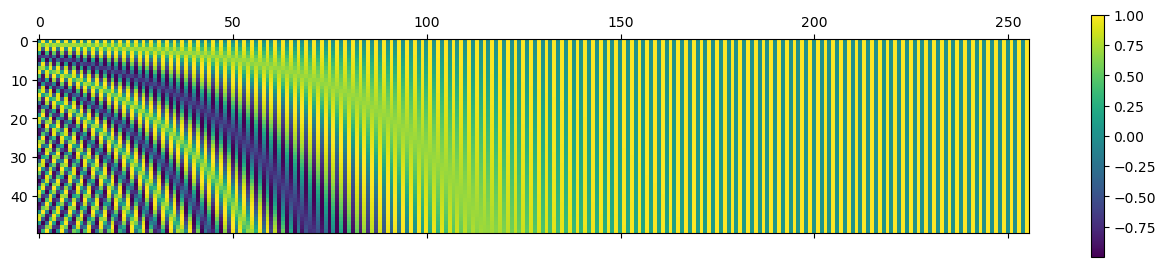

In [7]:
positionalMatrix = encodePositions(50, 256)
fig = plt.matshow(positionalMatrix)
plt.gcf().colorbar(fig)

# Self-Attention

In [8]:
from bertviz.transformers_neuron_view import BertModel, BertTokenizer
from bertviz.neuron_view import show

tokenizer_viz = BertTokenizer.from_pretrained(modelName)
model_viz = BertModel.from_pretrained(modelName)
show(model_viz, "bert", tokenizer_viz, "I read a good novel.", display_mode="light", head=11)

100%|██████████| 440473133/440473133 [00:07<00:00, 60747912.91B/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
show(model_viz, "bert", tokenizer_viz, "Attention is a novel idea.", display_mode="light", head=11)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Also play with https://huggingface.co/spaces/exbert-project/exbert

# GPT2 model (137M parameters)

In [10]:
from transformers import pipeline
generator = pipeline('text-generation', model='gpt2')
generator("I read a good novel.", max_length=30, num_return_sequences=5)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I read a good novel. The novel, from the standpoint of our heroes is that a character who is really, really flawed is the only hope for'},
 {'generated_text': "I read a good novel. The best. No, I haven't read so many, it's over 20 or 30 books. How about an hour"},
 {'generated_text': 'I read a good novel. You can write your own novel on a whim.\n\nI did write that novel. We got to try to think'},
 {'generated_text': "I read a good novel. Not because I could find it anywhere, but because I'd been reading it since 2005 and wanted to read a book I"},
 {'generated_text': 'I read a good novel. It might not have become your thing, but it does keep you awake at night. In fact, its popularity may have'}]

In [11]:
generator("This movie seemed really long.", max_length=300, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'This movie seemed really long. It had the most action, and the biggest fight ever. The action came down to two big shots, which were supposed to win the film. Now it\'s very obvious that they can only win with one shot. This is how people react when you watch an old fight at work, to see four or five big shots. (And they usually feel bad for doing it.)\n\nBut look how big the fight was. We were looking at a guy who was on his back and had to make a pretty big play on his back. Not like, "Oh, man, this was a pretty big fight, man." We\'re talking about just one person, with no sense of humor.\n\nBut there is another one of those guy who is in a different position than this guy. He\'s sitting on a corner in front of him. He\'s in a hurry to get the shot, but he doesn\'t have a shot. I want to push the film a bit more, and you\'re seeing in the movie, a guy with such a big fight, where he\'s just trying to do as little damage as possible. He\'s trying to get as deep a

In [12]:
generator("Star Trek" , max_length=100, num_return_sequences=5)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Star Trek: Deep Space Nine Season 7 Blu-ray Bonus Feature (Blu-ray)\n\nThe first, "Deep Space Nine: Special Edition," aired on Feb. 17, 1992, as part of the first season of the TV series Deep Space Nine. In an episode on The Power of Five, executive producer Doug Meehan (a.k.a. the "Star Trek: DS9 Guy") and show executive producer Steve Harland (a.k.a. the "'},
 {'generated_text': 'Star Trek: Discovery (1987), Star Trek: The Motion Picture (1990), Star Trek Trek: First Contact (1990), Star Trek: The Next Generation (?, Intellect Technologies, Inc), Star Trek: The Next Generation TV (1995) (C64) Star Trek III: The Final Frontier (2001) (Windows) STAR TREK II: THE NEXT GENERATIONS (2003, Time Inc. (Time Inc.) (Time Entertainment Productions)) (PS1) STAR TANS (2013,'},
 {'generated_text': 'Star Trek: Voyager The Voyager series was produced by CBS Television Studios, which is owned by CBS Entertainment.\n\nPlot summary: Voyager is a fictional space opera set within a s